# Animation for Propagation

## Objective

In this notebook guide, we will explain, examine and execute the numerous options for animating wave-type propagation of curves and images. The final objective is to dispose of a set of well-explained tools to visualize seismic wave propagation in heterogeneous media and be able to interactively study the results.

## Methods

We will present different approaches that can be chosen for wave propagation visualizations.

- Displaying in a loop (one-off).
- Saving snapshots to a video file, then displaying the video. 
- Using the `animation` module of Matplotlib.

We will show how to create animations of points, curves and surfaces (2D wavefield images).

## Libraries to install

- `matplotlib` that is usually installed anyway,
- `ffmpeg` that provides many output video generation formats,
- `ipympl` that facilitates basic interactive display inside a notebook.

## Notes

1. `.gif` files are very big, so use `.mp4` when saving a video to a file
2. with the latest versions of `jupyter`, the recommended way is to use the  animation framework of `matplotlib`

## Matplotlib Animations

- [Presentation](https://matplotlib.org/stable/users/explain/animations/animations.html)
- [Examples](https://matplotlib.org/stable/gallery/animation/index.html)


---

### Example 1 - pyplot

This is the most basic case. In a loop, we create an image, display, pause, create, diplay, pause...

**NOTE**
This example does not work in latest jupyter notebooks...

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.random((50, 50, 50))

fig, ax = plt.subplots()

for i, img in enumerate(data):
    ax.clear()
    ax.imshow(img)
    ax.set_title(f"frame {i}")
    # Note that using time.sleep does *not* work here!
    plt.pause(0.1)

### Example 2 - matplotlib's Animation framework

The `Animation`framework of `matplotlib` provides 2 basic methods for producing animations:

1. On-the-fly using `FuncAnimation`
2. From saved images using `ArtistAnimation`

**NOTE** 

The `FuncAnimation` command requires more complex coding, but is more efficient in that unneeded data is not stored.

`FuncAnimation` requires 4 steps:

1. Plot the initial figure as you would in a static plot. Save all the created artists, which are returned by the plot functions, in variables so that you can access and modify them later in the animation function.
2. Create an animation function that updates the artists for a given frame. Typically, this calls set_* methods of the artists.
3. Create a FuncAnimation, passing the Figure created in (1) and the Animation function of (2).
4. Save or show the animation. 

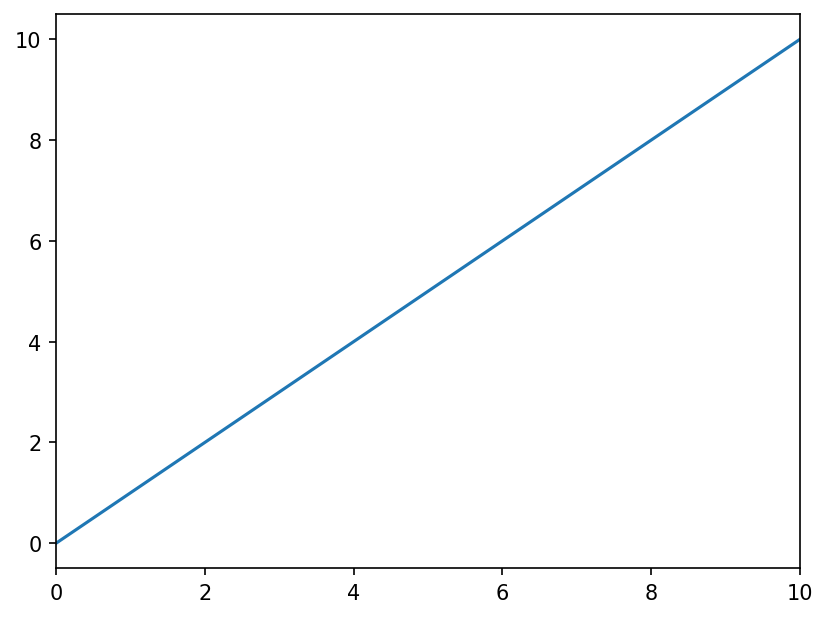

In [1]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

# For interactive display
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

# 1. Initialize the figure
fig, ax = plt.subplots()

x= np.linspace(0,10,100)

# 2. Create the animation/update function
def animate(t):
    plt.cla()
    plt.plot(x-t,x)
    plt.xlim(0,10)

# 3. Generate the animation
matplotlib.animation.FuncAnimation(fig, animate, frames=10)

### Example 3 - a moving sinusoid using matplotlib's Animation framework

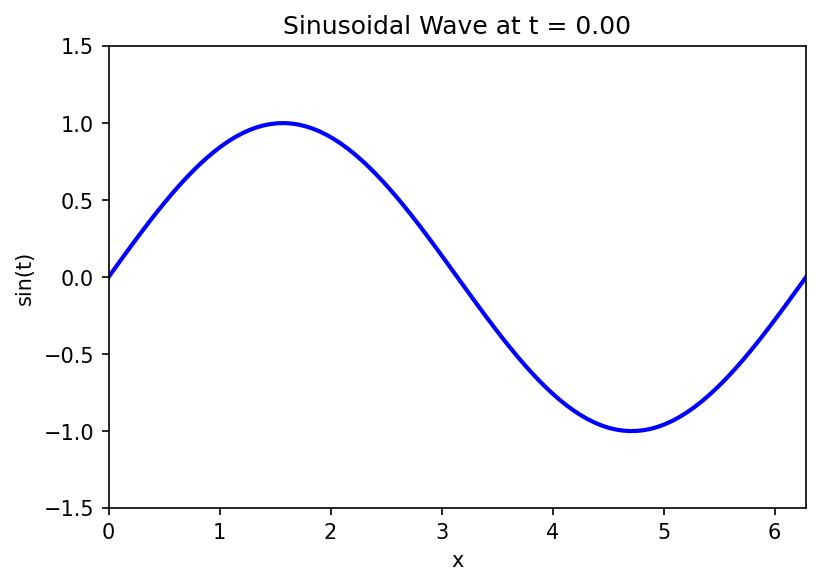

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
t_values = np.linspace(0, 2 * np.pi, 100)  # Time values for the x-axis
n_frames = 50  # Number of frames in the GIF
amplitude = 1  # Amplitude of the sine wave

# 1. Prepare the figure
fig, ax = plt.subplots(figsize=(6, 4))
line, = ax.plot([], [], lw=2, color='blue')
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-amplitude - 0.5, amplitude + 0.5)
ax.set_xlabel('x')
ax.set_ylabel('sin(t)')

# 2. Animation function
def update(frame):
    t = frame / n_frames * 2 * np.pi  # Map frame to time
    y_values = amplitude * np.sin(t_values + t)
    line.set_data(t_values, y_values)
    ax.set_title(f"Sinusoidal Wave at t = {t:.2f}")
    return line,

# 3. Create animation
ani = FuncAnimation(fig, update, frames=n_frames, blit=True)

In [3]:
# Set HTML output and run the animation
plt.rcParams["animation.html"] = "jshtml"
ani

In [4]:
# save the animation to a video file
output_filename = "sinusoidal_animation.gif"
ani.save(output_filename, writer=PillowWriter(fps=20), dpi=150)

print(f"Animation saved as {output_filename}")

Animation saved as sinusoidal_animation.gif


In [5]:
# To save the animation to .mp4 format
ani.save("sinusoidal_animation.mp4")
#
# or for more precision:
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

In [6]:
%%HTML
<video controls loop width="640" height="480">
  <source src="./sinusoidal_animation.mp4" type="video/mp4">
</video>

### Example 4 -  Use of ArtistAnimation option

Here we pre-compute a list of images, and then generate the animation using `ArtistAnimation.`

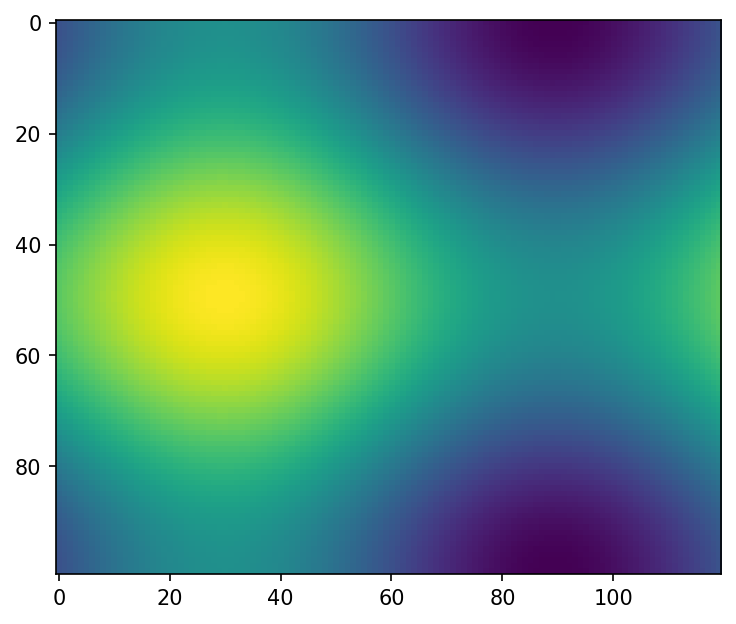

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = ax.imshow(f(x, y), animated=True)
    if i == 0:
        ax.imshow(f(x, y))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
ani.save("movie.mp4")
#ani.save("movie.gif")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [8]:
%%HTML
<video controls loop width="640" height="480">
  <source src="./movie.mp4" type="video/mp4">
</video>

In [9]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  

ani

### Example 5 - FuncAnimation of an image

Instead of saving the images, we can display them on-the-fly, as was done above for the curves in Examples 2 and 3.

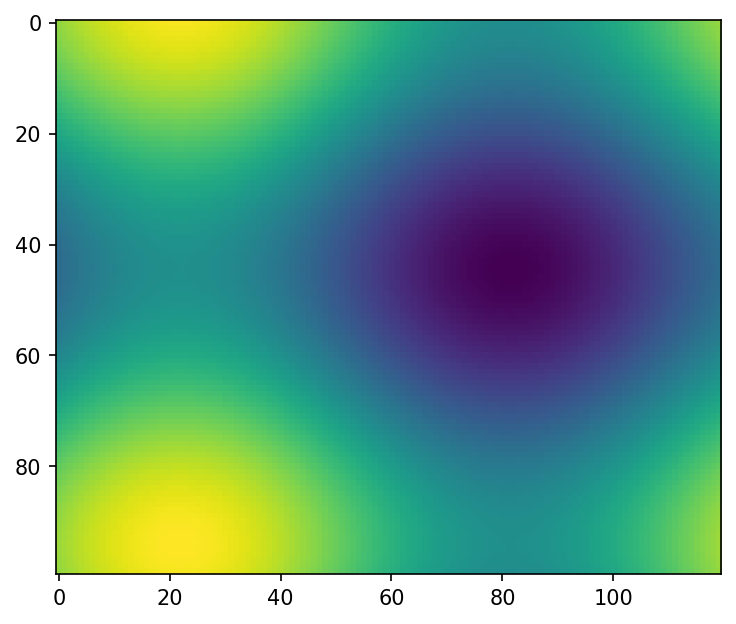

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

#ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True, frames=50, repeat=False)
ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=10)

In [11]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  

ani